In [1]:
import DataImport_header as h
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from scipy import stats
from scipy.ndimage.filters import uniform_filter1d

from scipy import constants
from timeit import timeit

import Analysis_header as an
import scipy.fftpack
import scipy.optimize

C:\Users\Brian Bostwick\AppData\Local\Temp\ipykernel_17516\2281188213.py:7: DeprecationWarning: Please use `uniform_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import uniform_filter1d


In [2]:
#contants
e       = sp.constants.value(u'elementary charge')            #1.602176634e-19 C
epsilon = sp.constants.value(u'vacuum electric permittivity') #8.8541878128e-12 F m^-1
pi      = sp.pi                                               #3.141592653589793
m_e     = sp.constants.value(u'electron mass')                #9.1093837015e-31 kg
c       = sp.constants.value(u'speed of light in vacuum')     #299792458.0 m s^-1

kg2amu = sp.constants.value(u'kilogram-atomic mass unit relationship') #6.0221407621e+26 u
amu2kg = 1/kg2amu

line = "____________________________________________________"
bline= "===================================================="

In [3]:
dt    = 1.0e-6      #meters
steps = 200000
period = 1         #interval for taking data
mass  = 87*1.66e-27 #amu

power = 1.0
e_sqrd_radius = 60.0e-6

In [4]:
file_num  = "/pos"

#macbook
# filePos = "/Users/brianbostwick/Mirror/Code/AtomECS/" + file_num + ".txt"

#workcomupter
filePos = "../AtomECS" + file_num + ".txt"

PosData = an.get_particle_data( filePos )[2]

In [13]:
def plot_trap_freq( position, PosData):
    
    time = np.linspace(0, steps*dt, int(steps/period))
    x  = an.reformat(PosData, position)

    fit = an.fit_sin(time, x)
    fit_curve = fit["fitfunc"]
    w   = fit["omega"]
    
    truncate = 2 * int( 2*np.pi / w / (steps*dt) * len(time) )
    
    title = lambda x: ['x','y','z'][x]
    plt.plot( time[:truncate], x[:truncate], '.' )
    plt.plot( time[:truncate], fit_curve(time[:truncate]), '--', label = f"fit freq = {w}]" )
    plt.title(f"position: {title(position)}")
    plt.xlabel(" time [ s ]")
    plt.ylabel(" position [ m ] ")
    plt.legend()
    plt.show()

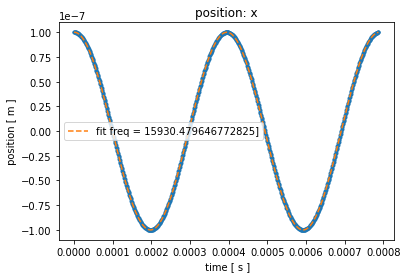

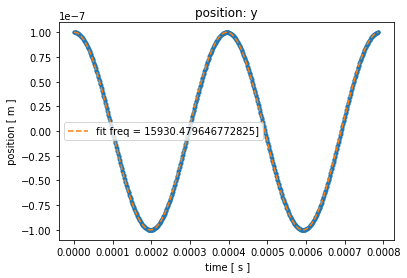

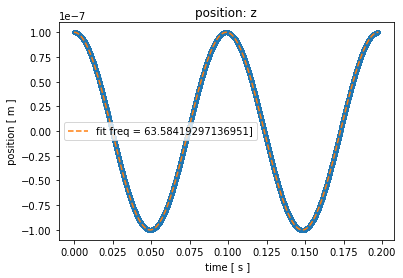

In [14]:
plot_trap_freq( 0, PosData)
plot_trap_freq( 1, PosData)
plot_trap_freq( 2, PosData)